In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../data/'

In [73]:
df = pd.read_csv(path+'data_fs.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [76]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [77]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
print("Age: ", df['Age'].unique())
print("Sex: ", df['Sex'].unique())
print("Job: ", df['Job'].unique())
print("Housing: ", df['Housing'].unique())
print("Saving accounts: ", df['Saving accounts'].unique())
print("Checking account: ", df['Checking account'].unique())
# print("Credit amount: ", df['Credit amount'].unique())
# print("Duration: ", df['Duration'].unique())
print("Purpose: ", df['Purpose'].unique())

Age:  [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Sex:  ['male' 'female']
Job:  [2 1 3 0]
Housing:  ['own' 'free' 'rent']
Saving accounts:  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account:  ['little' 'moderate' nan 'rich']
Purpose:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


<AxesSubplot:>

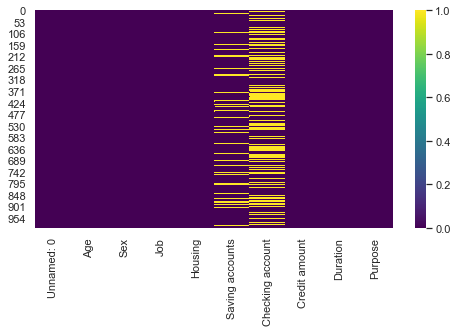

In [38]:
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull(),cmap='viridis')

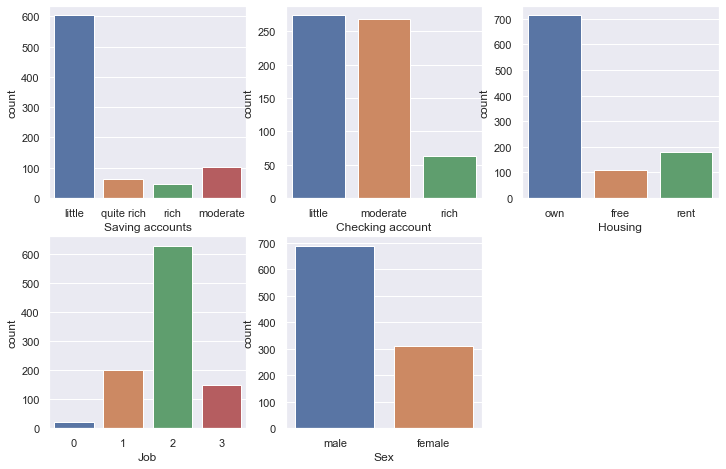

In [91]:
plt.figure(figsize=(12,12))
r,c=3,3
plt.subplot(r,c,1)
sns.countplot(df['Saving accounts']);

plt.subplot(r,c,2)
sns.countplot(df['Checking account']);

plt.subplot(r,c,3)
sns.countplot(df['Housing']);

plt.subplot(r,c,4)
sns.countplot(df['Job']);

plt.subplot(r,c,5)
sns.countplot(df['Sex']);

# plt.subplot(r,c,6)


[Text(0.5, 0, '')]

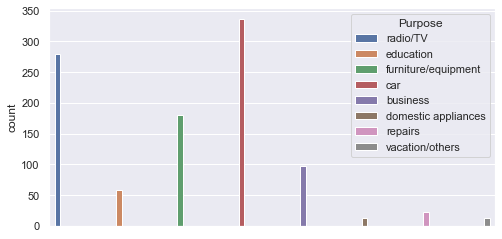

In [106]:
g1= sns.countplot(df['Purpose'], hue='Purpose', data=df);
g1.set(xticklabels=[])
g1.set(xlabel=None)

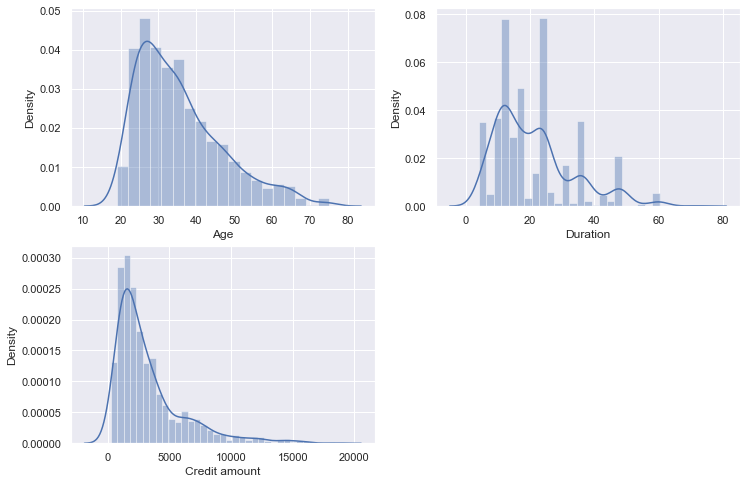

In [85]:
r,c=2,2
plt.figure(figsize=(12,8))
plt.subplot(r,c,1)
sns.distplot(df['Age']);

plt.subplot(r,c,2)
sns.distplot(df['Duration']);

plt.subplot(r,c,3)
sns.distplot(df['Credit amount']);

<AxesSubplot:>

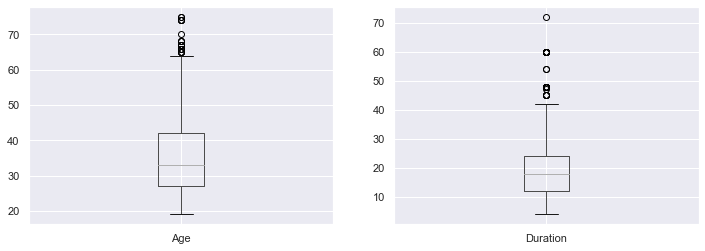

In [120]:
r,c=1,2
plt.figure(figsize=(12,4))
plt.subplot(r,c,1)
df.boxplot(['Age'])

plt.subplot(r,c,2)
df.boxplot(['Duration'])


<AxesSubplot:>

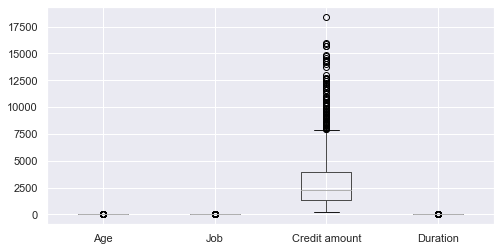

In [114]:
df.boxplot()

In [163]:
# mae, mse 
xgboost  = [0.4402833266245564,.3134998249865217]
# mae = 0.4402833266245564
# mse = 3134998249865217

Adaboost = [0.47994612092996974,0.3483535426096638]
# mae : 0.47994612092996974
# mse : 0.3483535426096638


In [122]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [149]:
results = pd.DataFrame(Adaboost+xgboost, columns=['a'])
results

,a
0,4.799461e-01
1,3.483535e-01
2,4.402833e-01
3,3.134998e+15


In [165]:
Adaboost+xgboost

[0.47994612092996974,
 0.3483535426096638,
 0.4402833266245564,
 0.3134998249865217]

In [ ]:
# Results of xgboost and adaboost

Text(0.5, 1.0, 'mse, mae ')

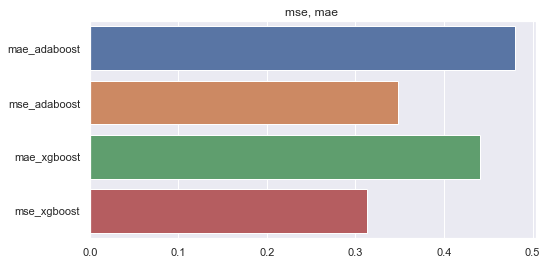

In [177]:
sns.barplot(Adaboost+xgboost,y=['mae_adaboost','mse_adaboost','mae_xgboost','mse_xgboost'],)
plt.title('mse, mae ')